### Aula 1: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [4]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados da IBM:

**a)** Faça um gráfico de dispersão (scatter plot) com a variável *YearsAtCompany* no eixo X e a variável *DailyRate* no eixo Y. Coloque o título "YearsAtCompany x DailyRate" e determine o tamanho da imagem como (10,5).

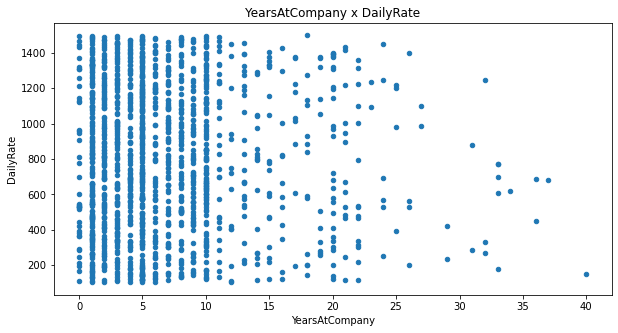

In [5]:
df1.plot(x='YearsAtCompany', y='DailyRate', kind='scatter', figsize=(10,5), title='YearsAtCompany x DailyRate')

plt.show()

**b)** Repita o gráfico do item a, identificando as observações do gênero feminino com a cor vermelha e do gênero masculino com a cor verde. Não esqueça de inserir legenda para as cores.

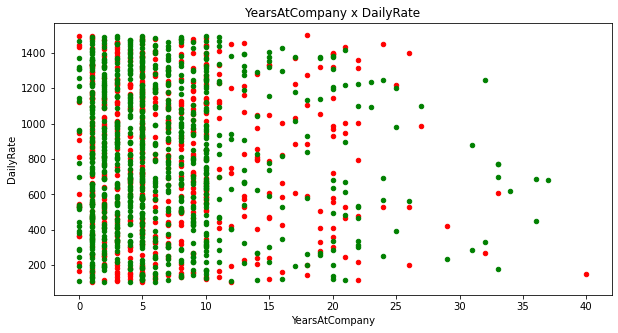

In [6]:
ax1 = df1[df1['Gender'] == 'Female'].plot(x='YearsAtCompany', y='DailyRate', 
                                          kind='scatter', title='YearsAtCompany x DailyRate',
                                          figsize=(10,5),  
                                          color='red')

ax2 = df1[df1['Gender'] == 'Male'].plot(x='YearsAtCompany', y='DailyRate', 
                                        kind='scatter', ax=ax1, 
                                        color='green')

plt.show()

**c)** Repita o gráfico do item a, porém agora identificando os funcionários pela variável 'JobSatisfaction', 
utilizando a seguinte escala de cores:
- cor: '#FFE4E1' para 'Low' 
- cor: '#FFB6C1' para 'Medium' 
- cor: '#FF69B4' para 'High' 
- cor: '#C71585' para 'Very High' 

In [11]:
df1['JobSatisfaction'].unique()

array([4, 2, 3, 1])

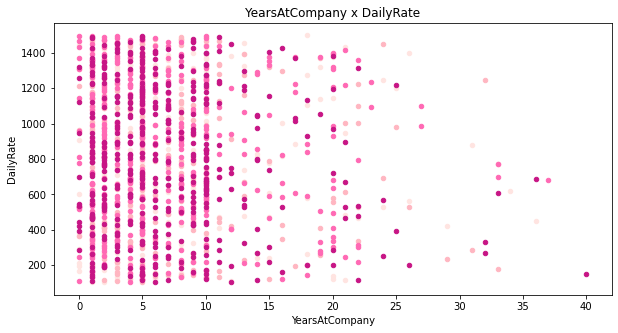

In [13]:
ax1 = df1[df1['JobSatisfaction'] == 1].plot(x='YearsAtCompany', y='DailyRate', 
                                            kind='scatter', title='YearsAtCompany x DailyRate',
                                            figsize=(10,5), color='#FFE4E1')

ax2 = df1[df1['JobSatisfaction'] == 2].plot(x='YearsAtCompany', y='DailyRate', 
                                            kind='scatter', ax=ax1,
                                            color='#FFB6C1')

ax3 = df1[df1['JobSatisfaction'] == 3].plot(x='YearsAtCompany', y='DailyRate', 
                                            kind='scatter', ax=ax1,
                                            color='#FF69B4')

ax3 = df1[df1['JobSatisfaction'] == 4].plot(x='YearsAtCompany', y='DailyRate', 
                                            kind='scatter', ax=ax1,
                                            color='#C71585')
plt.show()

## Exercício 2

**a)** Utilizando a base de dados de covid, crie um gráfico de linhas mostrando a evolução do número de casos novos mês a mês, para as DRS 'Grande São Paulo', 'São José do Rio Preto' e 'Marília'. Identifique os DRS por cores e legenda. Não esqueça de colocar título para o gráfico e para os eixos. 

In [32]:
df3 = df2[df2['nome_drs'].isin(drs)].groupby(['ano_mes', 'nome_drs']).sum()
df3.head()

codigo_ibge  cod_drs         pop     pop_60  \
ano_mes nome_drs                                                             
2020-02 Grande São Paulo         137642196    390.0  21138247.0  3056864.0   
        Marília                  218755091    310.0   1109670.0   200936.0   
        São José do Rio Preto    360255048   1530.0   1570421.0   291350.0   
2020-03 Grande São Paulo         137642196    390.0  21138247.0  3056864.0   
        Marília                  218755091    310.0   1109670.0   200936.0   

                               casos_novos  obitos_novos  
ano_mes nome_drs                                          
2020-02 Grande São Paulo                 1             0  
        Marília                          0             0  
        São José do Rio Preto            0             0  
2020-03 Grande São Paulo              2186           132  
        Marília                          0             0

In [37]:
drs = ('Grande São Paulo', 'Marília', 'São José do Rio Preto')

df2['ano_mes'] = pd.Categorical(df2['ano_mes'], categories=('2020-02', '2020-03', '2020-04', '2020-05', '2020-06'), ordered=True)

df3.plot(x=df3.index, y='obitos_novos', kind='line')

KeyError: "None of [MultiIndex([('2020-02',      'Grande São Paulo'),\n            ('2020-02',               'Marília'),\n            ('2020-02', 'São José do Rio Preto'),\n            ('2020-03',      'Grande São Paulo'),\n            ('2020-03',               'Marília'),\n            ('2020-03', 'São José do Rio Preto'),\n            ('2020-04',      'Grande São Paulo'),\n            ('2020-04',               'Marília'),\n            ('2020-04', 'São José do Rio Preto'),\n            ('2020-05',      'Grande São Paulo'),\n            ('2020-05',               'Marília'),\n            ('2020-05', 'São José do Rio Preto'),\n            ('2020-06',      'Grande São Paulo'),\n            ('2020-06',               'Marília'),\n            ('2020-06', 'São José do Rio Preto')],\n           names=['ano_mes', 'nome_drs'])] are in the [columns]"

**b)** Repita o gráfico do item a trocando as cores dos DRS.

In [8]:
df2

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos,casos_novos,obitos,obitos_novos
0,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-02,0,0,0,0
1,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-03,0,0,0,0
2,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-04,28,5,0,0
3,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-05,717,34,27,2
4,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-06,163,3,10,1
...,...,...,...,...,...,...,...,...,...,...,...
3220,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-02,0,0,0,0
3221,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-03,0,0,0,0
3222,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-04,0,0,0,0
3223,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-05,0,0,0,0


**c)** Considerando apenas os DRS 'Bauru', 'São José do Rio Preto' e 'Marília', faça três gráficos de pizza, para os meses de abril, maio e junho, mostrando a porcentagem de novos óbitos em cada DRS.